In [200]:
#This jupyter notebook is prepared by "Tulio Contramaestre"

## 1. Load data and perform general EDA

In [201]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import scipy as stats
import sklearn as learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [202]:
data = pd.read_csv("hrdata3.csv", index_col=0)
data.shape

(12977, 7)

In [203]:
## first 5
data.head()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
1,29725,0.776,15,2,5,47,0.0
4,666,0.767,21,2,4,8,0.0
6,28806,0.920,5,2,1,24,0.0
7,402,0.762,13,0,5,18,1.0
8,27107,0.920,7,2,1,46,1.0


In [204]:
## last 5
data.tail()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
19149,251,0.920,9,2,1,36,1.0
19150,32313,0.920,10,3,3,23,0.0
19152,29754,0.920,7,1,1,25,0.0
19155,24576,0.920,21,2,4,44,0.0
19156,5756,0.802,0,4,2,97,0.0


<AxesSubplot:>

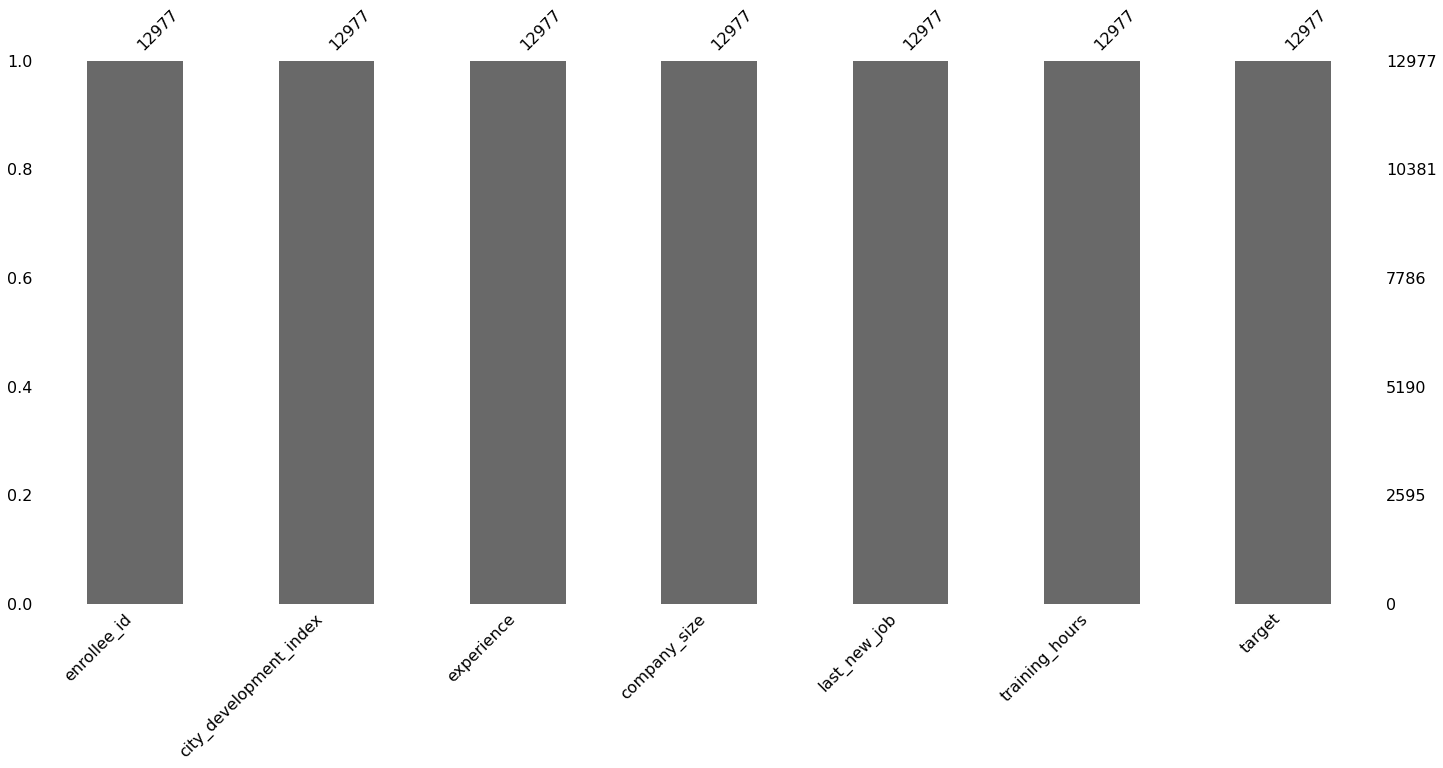

In [205]:
msno.bar(data)

In [206]:
data.isnull().sum()

enrollee_id               0
city_development_index    0
experience                0
company_size              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [207]:
data.apply(lambda columns: pd.to_numeric(columns).notnull().all())

enrollee_id               True
city_development_index    True
experience                True
company_size              True
last_new_job              True
training_hours            True
target                    True
dtype: bool

all values are set to true therefore, all values are numeric

<AxesSubplot:>

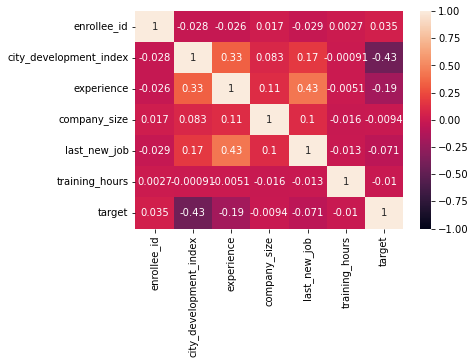

In [208]:
sns.heatmap(data.corr(), vmin= -1, vmax= 1, annot=True)

## 2. Feature Selection and Pre-processing

In [209]:
x = data[data.columns[~data.columns.isin(['target', 'enrollee_id'])]]

In [210]:
x

,city_development_index,experience,company_size,last_new_job,training_hours
1,0.776,15,2,5,47
4,0.767,21,2,4,8
6,0.920,5,2,1,24
7,0.762,13,0,5,18
8,0.920,7,2,1,46
...,...,...,...,...,...
19149,0.920,9,2,1,36
19150,0.920,10,3,3,23
19152,0.920,7,1,1,25
19155,0.920,21,2,4,44


In [211]:
scaler = StandardScaler()
scaler.fit(x)

x_scaled = scaler.transform(x)

In [212]:
x_scaled_df = pd.DataFrame(x_scaled, index=x.index, columns=x.columns)

In [213]:
x_scaled_df

,city_development_index,experience,company_size,last_new_job,training_hours
1,-0.503422,0.633957,-0.574723,1.690762,-0.308396
4,-0.578413,1.546009,-0.574723,1.081137,-0.951805
6,0.696434,-0.886130,-0.574723,-0.747739,-0.687842
7,-0.620075,0.329940,-1.488268,1.690762,-0.786828
8,0.696434,-0.582112,-0.574723,-0.747739,-0.324894
...,...,...,...,...,...
19149,0.696434,-0.278095,-0.574723,-0.747739,-0.489870
19150,0.696434,-0.126086,-0.117951,0.471512,-0.704340
19152,0.696434,-0.582112,-1.031496,-0.747739,-0.671344
19155,0.696434,1.546009,-0.574723,1.081137,-0.357889


In [214]:
x_scaled

array([[-0.50342203,  0.63395707, -0.5747232 ,  1.69076217, -0.30839586],
       [-0.57841303,  1.54600905, -0.5747232 ,  1.08113696, -0.95180478],
       [ 0.69643399, -0.88612956, -0.5747232 , -0.74773864, -0.68784215],
       ...,
       [ 0.69643399, -0.58211224, -1.0314958 , -0.74773864, -0.67134448],
       [ 0.69643399,  1.54600905, -0.5747232 ,  1.08113696, -0.35788885],
       [-0.28678136, -1.64617288,  0.338822  , -0.13811344,  0.51648738]])

## 3. Kmeans Clustering

### cluster center and kmenas on x

In [215]:
kmean = learn.cluster.KMeans(n_clusters= 2, random_state= 47, init= 'k-means++')
kmean.fit(x_scaled)
kmean.predict(x_scaled)

array([1, 1, 0, ..., 0, 1, 0])

In [216]:
kmean.cluster_centers_

array([[-0.31364817, -0.63941844, -0.15207764, -0.55076921,  0.01170319],
       [ 0.44177356,  0.90062111,  0.21420141,  0.77575864, -0.01648395]])

In [217]:
x_inveresed = scaler.inverse_transform(x_scaled)

In [218]:
x_inveresed

array([[ 0.776, 15.   ,  2.   ,  5.   , 47.   ],
       [ 0.767, 21.   ,  2.   ,  4.   ,  8.   ],
       [ 0.92 ,  5.   ,  2.   ,  1.   , 24.   ],
       ...,
       [ 0.92 ,  7.   ,  1.   ,  1.   , 25.   ],
       [ 0.92 , 21.   ,  2.   ,  4.   , 44.   ],
       [ 0.802,  0.   ,  4.   ,  2.   , 97.   ]])

In [219]:
x_invered_df = pd.DataFrame(x_inveresed, index=x.index, columns=x.columns)

In [220]:
x_invered_df

,city_development_index,experience,company_size,last_new_job,training_hours
1,0.776,15.0,2.0,5.0,47.0
4,0.767,21.0,2.0,4.0,8.0
6,0.920,5.0,2.0,1.0,24.0
7,0.762,13.0,0.0,5.0,18.0
8,0.920,7.0,2.0,1.0,46.0
...,...,...,...,...,...
19149,0.920,9.0,2.0,1.0,36.0
19150,0.920,10.0,3.0,3.0,23.0
19152,0.920,7.0,1.0,1.0,25.0
19155,0.920,21.0,2.0,4.0,44.0


In [221]:
kmean.fit(x_inveresed)

KMeans(n_clusters=2, random_state=47)

In [222]:
kmean.cluster_centers_

array([[  0.83639888,  10.83377685,   3.26905531,   2.23474625,
         41.97690553],
       [  0.83649939,  10.81099796,   3.21181263,   2.19144603,
        167.34052953]])

The cluster centers of the inveresed value are much larger and in the positive end of the spectrum incomparison to the scaled version of X the values in the scaled kmean cluster also seem to be more consistent and tend not to have outliers, like in the inverse where 167 and 41 are outliers to the rest of the data. the first value in the array is clearly correlated to the city development index, the second value in the array is related to experience. The third value in the array is related to company size. The the 4th value is related to the last new job column. The 4th value in the array seem to be related to the training hours column.

### Distance matrix

In [223]:
kmean.fit(x_scaled)

KMeans(n_clusters=2, random_state=47)

In [224]:
kmean.transform(x_scaled)

array([[2.6387601 , 1.58409296],
       [2.93535149, 1.74579189],
       [1.3371321 , 2.57904978],
       ...,
       [1.51732572, 2.56222519],
       [2.96221279, 1.14612076],
       [1.2962834 , 2.85511871]])

In [225]:
print(kmean.labels_)

[1 1 0 ... 0 1 0]


In [226]:
data['cluster_label'] = kmean.labels_

In [227]:
data

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label
1,29725,0.776,15,2,5,47,0.0,1
4,666,0.767,21,2,4,8,0.0,1
6,28806,0.920,5,2,1,24,0.0,0
7,402,0.762,13,0,5,18,1.0,1
8,27107,0.920,7,2,1,46,1.0,0
...,...,...,...,...,...,...,...,...
19149,251,0.920,9,2,1,36,1.0,0
19150,32313,0.920,10,3,3,23,0.0,1
19152,29754,0.920,7,1,1,25,0.0,0
19155,24576,0.920,21,2,4,44,0.0,1


### VI. change target to target_int

In [228]:
data['target_int'] = data['target'].astype(int)

In [229]:
data

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label,target_int
1,29725,0.776,15,2,5,47,0.0,1,0
4,666,0.767,21,2,4,8,0.0,1,0
6,28806,0.920,5,2,1,24,0.0,0,0
7,402,0.762,13,0,5,18,1.0,1,1
8,27107,0.920,7,2,1,46,1.0,0,1
...,...,...,...,...,...,...,...,...,...
19149,251,0.920,9,2,1,36,1.0,0,1
19150,32313,0.920,10,3,3,23,0.0,1,0
19152,29754,0.920,7,1,1,25,0.0,0,0
19155,24576,0.920,21,2,4,44,0.0,1,0


In [230]:
data.head()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label,target_int
1,29725,0.776,15,2,5,47,0.0,1,0
4,666,0.767,21,2,4,8,0.0,1,0
6,28806,0.920,5,2,1,24,0.0,0,0
7,402,0.762,13,0,5,18,1.0,1,1
8,27107,0.920,7,2,1,46,1.0,0,1


### VIII. confusion matrix and classification report

In [231]:
print(confusion_matrix(data['target_int'], data['cluster_label']))
print(classification_report(data['target_int'], data['cluster_label']))

[[5835 4860]
 [1747  535]]
              precision    recall  f1-score   support

           0       0.77      0.55      0.64     10695
           1       0.10      0.23      0.14      2282

    accuracy                           0.49     12977
   macro avg       0.43      0.39      0.39     12977
weighted avg       0.65      0.49      0.55     12977



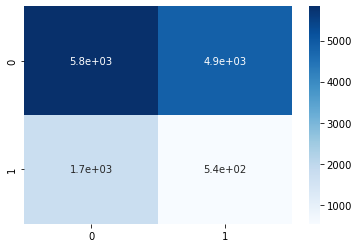

In [232]:
matrix = confusion_matrix(data['target_int'], data['cluster_label'])
ax = sns.heatmap(matrix, annot= True, cmap= 'Blues')

In [233]:
misclassified = np.where(data['target_int'] != data['cluster_label'])

print("num missclassified " + str(len(misclassified[0])))

num missclassified 6607


there is a low accuracy between target_int and cluster_label it is slightly below 50%, the higher number of missclassified data can be used to support this. Decently high prediction rate for 0,0 but not another values, true negative is high in comparision to other values. Eventhough the accuracy is somewhat low, the precision seems to stay at some what high levels.

### X. Inertia

In [234]:
kmean.inertia_

49643.86379769525

### XI. Elbow method

During the elbow methos we will be chaning and varying the number of clusters from 1-20 or 1-10 or 2-20. This will help us form a graph in where we can locate the point where the graph creates a dip or an elbow. Where this point is the most optimal number of clusters for the model. The number of clusters and kmeans will be up against WCSS or the sum of squares between each point in the centroid.

### XII.

In [235]:
wcss = []

for i in range(2,20):
    kmeans = learn.cluster.KMeans(n_clusters= i, random_state= 47, init= 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

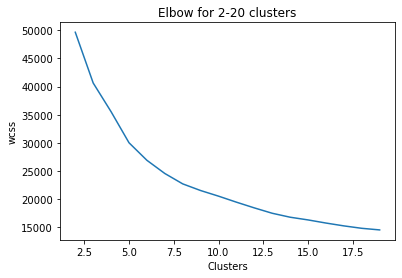

In [236]:
plt.plot(range(2,20), wcss)
plt.title("Elbow for 2-20 clusters")
plt.xlabel("Clusters")
plt.ylabel("wcss")
plt.show

### XIII. training hours against experience

In [237]:
data

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label,target_int
1,29725,0.776,15,2,5,47,0.0,1,0
4,666,0.767,21,2,4,8,0.0,1,0
6,28806,0.920,5,2,1,24,0.0,0,0
7,402,0.762,13,0,5,18,1.0,1,1
8,27107,0.920,7,2,1,46,1.0,0,1
...,...,...,...,...,...,...,...,...,...
19149,251,0.920,9,2,1,36,1.0,0,1
19150,32313,0.920,10,3,3,23,0.0,1,0
19152,29754,0.920,7,1,1,25,0.0,0,0
19155,24576,0.920,21,2,4,44,0.0,1,0


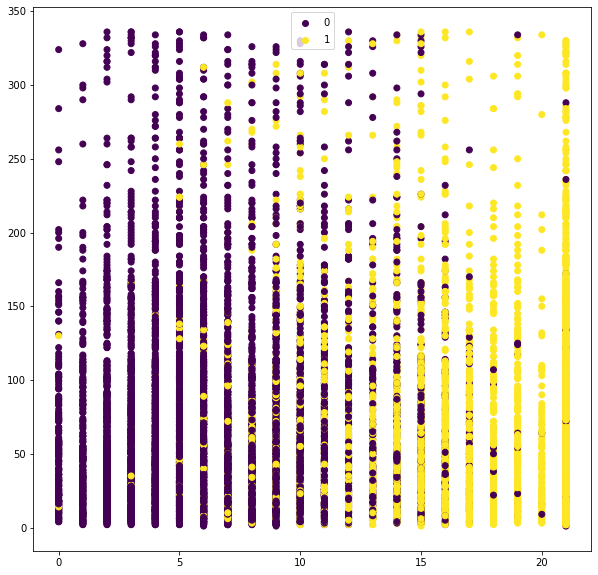

In [238]:
plt.figure(figsize=(10,10))

plot = plt.scatter(data['experience'],data['training_hours'], c = kmean.labels_)
plt.legend(*plot.legend_elements(), loc = 'upper center')

this graph shows the clustering between experience and training hours. From this we can clearly see that they are mostly split along the 10 to 12 experience mark some on the values overlap and stretch into the other clusers due to the innacuracy of the data. so our grouping/clustering is not fully seprated

### XIV. scatter plot of two other attributes

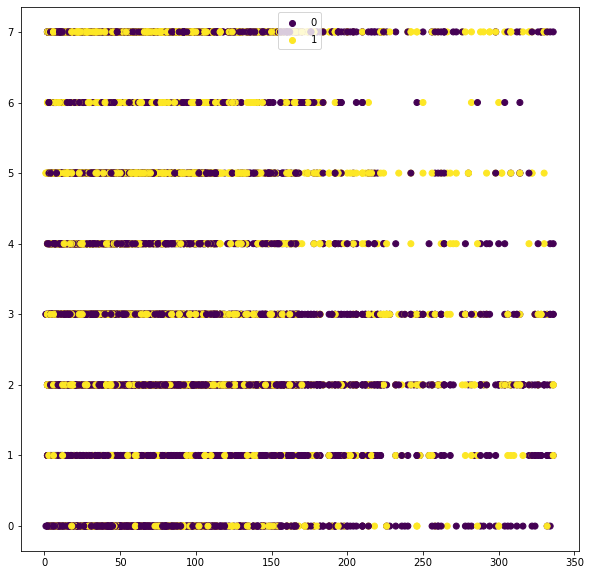

In [239]:
plt.figure(figsize=(10,10))

plt.scatter(data['training_hours'],data['company_size'], c = kmean.labels_)
plt.legend(*plot.legend_elements(), loc = 'upper center')

This scatter plot shows the relation between training hours and company size with their correspoding clusters. As it can be seen the clusters are pretty blended together and it is hard to notice the data spread due to the large amount of data and little amount of y values. Most 0 values are located near the intersection between 0 company size and 50 training hours. While values of 1 tend to be closer to the top of the 

## 4. AgglomerativeClustering

In [240]:
data

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label,target_int
1,29725,0.776,15,2,5,47,0.0,1,0
4,666,0.767,21,2,4,8,0.0,1,0
6,28806,0.920,5,2,1,24,0.0,0,0
7,402,0.762,13,0,5,18,1.0,1,1
8,27107,0.920,7,2,1,46,1.0,0,1
...,...,...,...,...,...,...,...,...,...
19149,251,0.920,9,2,1,36,1.0,0,1
19150,32313,0.920,10,3,3,23,0.0,1,0
19152,29754,0.920,7,1,1,25,0.0,0,0
19155,24576,0.920,21,2,4,44,0.0,1,0


In [241]:
# data_scaled = normalize(data)

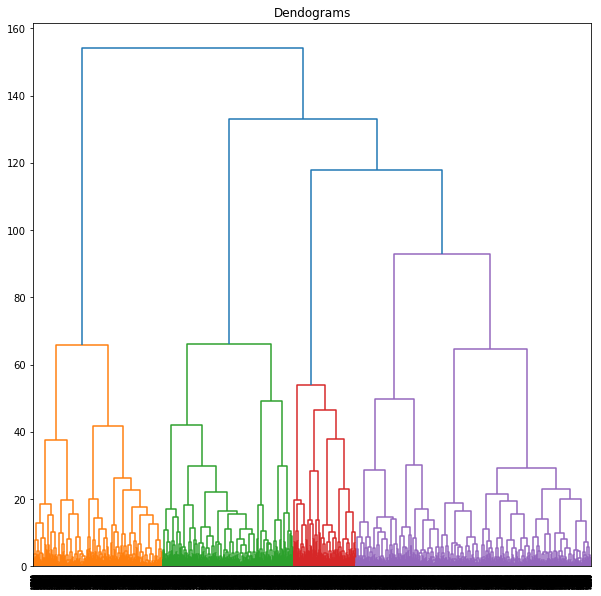

In [242]:
plt.figure(figsize=(10,10))

plt.title("Dendograms")
dendo = shc.dendrogram(shc.linkage(x_scaled, method= 'ward'))

In [243]:
cluster = AgglomerativeClustering(n_clusters= 2, affinity= 'euclidean', linkage= 'ward')
cluster.fit_predict(x_scaled)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

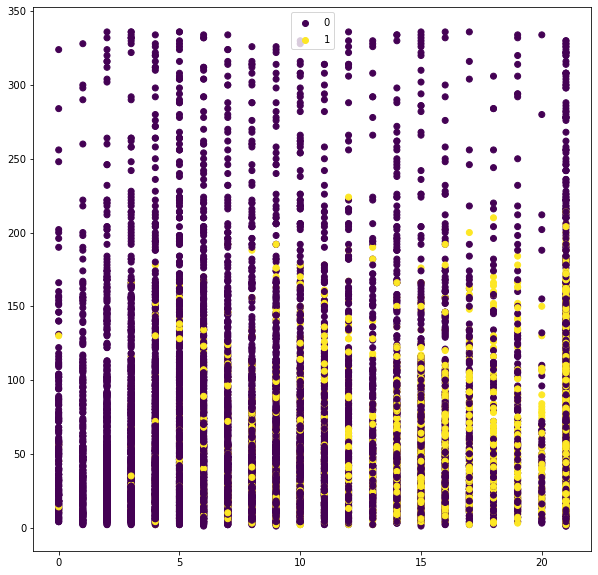

In [244]:
plt.figure(figsize=(10,10))

plot = plt.scatter(data['experience'],data['training_hours'], c = cluster.labels_)
plt.legend(*plot.legend_elements(), loc = 'upper center')

the graph above shows the graph for experience vs training_hours, with the corresponding clusters. as it can be see most of the data that is set to 1 is located near the center (0,0) of the data. Most of the data also seems to be apart of the cluster 1 while a small part of the data is a part of cluster 0. Cluster 0 is mostly located near the bottom right portion of the graph or (20,100)

### 4. increase number of clusters to 4

In [246]:
cluster = AgglomerativeClustering(n_clusters= 4, affinity= 'euclidean', linkage= 'ward')
cluster.fit_predict(x_scaled)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

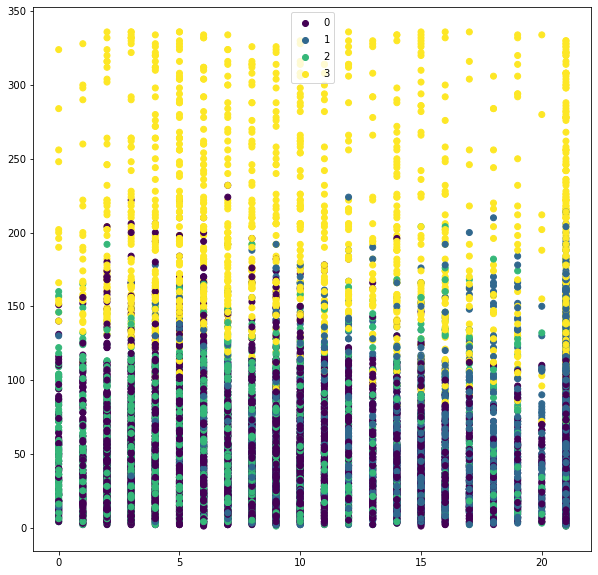

In [247]:
plt.figure(figsize=(10,10))

plot = plt.scatter(data['experience'],data['training_hours'], c = cluster.labels_)
plt.legend(*plot.legend_elements(), loc = 'upper center')

This graph contains 4 clusters and are marked by yellow, blue, green, purple. As shown by the graph cluster 3 (Yellow) takes up most/all of the top side of the graph from 150 training_hours to 350 training_hours. While the rest of the clusters/data is located below 150 training hours. cluster 2 is located near the lower left of the graph, from 0 to 10 experience. Cluster 1 is mostly located near the bottom right of the graph from 10 experience to the end. Cluster 0 is split up and spread near the bottom of the plot. By adding more clusters we can easily tell and notice the data disparity and spread, compared to 2 clusters.